In [1]:
import flickrapi
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib

args = Namespace(
    # Data and Path information
    api_key = u'9e32e17383e134335b5cabf2eb186b7a',
    api_secret = u'781aa9cac0a656c9',
    radius = 5,
    save_dir = 'data_storage/',
    image_dir = 'data_storage/images/'
)

In [2]:
flickr = flickrapi.FlickrAPI(args.api_key, args.api_secret)

In [629]:
sizes = json.loads(flickr.photos.getSizes(photo_id = '50769627753', format='json'))

In [635]:
sizes['sizes']['size'][4]

{'label': 'Small 320',
 'width': 224,
 'height': 320,
 'source': 'https://live.staticflickr.com/65535/50769627753_94656689ff_n.jpg',
 'url': 'https://www.flickr.com/photos/studiaphotos/50769627753/sizes/n/',
 'media': 'photo'}

In [9]:
with open(args.image_dir+'grid/Photo_sizes.p', 'rb') as fp:
    sizes = pickle.load(fp)

In [10]:
sizes

{50770182122: {'candownload': 0,
  'url_c': 'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_c.jpg',
  'url_q': 'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_q.jpg',
  'others': {'sizes': {'canblog': 0,
    'canprint': 0,
    'candownload': 0,
    'size': [{'label': 'Square',
      'width': 75,
      'height': 75,
      'source': 'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_s.jpg',
      'url': 'https://www.flickr.com/photos/noukorama/50770182122/sizes/sq/',
      'media': 'photo'},
     {'label': 'Large Square',
      'width': 150,
      'height': 150,
      'source': 'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_q.jpg',
      'url': 'https://www.flickr.com/photos/noukorama/50770182122/sizes/q/',
      'media': 'photo'},
     {'label': 'Thumbnail',
      'width': 67,
      'height': 100,
      'source': 'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_t.jpg',
      'url': 'https://www.flickr.com/photos/noukorama/50770182

In [70]:
with open(args.image_dir+'grid/Photo_sizes_sep.p', 'rb') as fp:
    seps = pickle.load(fp)

In [71]:
seps

{'ids': {}}

In [17]:
img_df = pd.read_csv(args.image_dir+'grid/photos_sizes.csv',sep='\t').rename(columns={'Unnamed: 0':'ids'})
#img_df = img_df[img_df.ids!=50333877511]

In [18]:
img_df

,ids,candownload,url_c,url_q
0,50770182122,0.0,https://live.staticflickr.com/65535/5077018212...,https://live.staticflickr.com/65535/5077018212...
1,50770181367,0.0,https://live.staticflickr.com/65535/5077018136...,https://live.staticflickr.com/65535/5077018136...
2,50770065816,0.0,https://live.staticflickr.com/65535/5077006581...,https://live.staticflickr.com/65535/5077006581...
3,50770737177,0.0,https://live.staticflickr.com/65535/5077073717...,https://live.staticflickr.com/65535/5077073717...
4,50769627753,0.0,https://live.staticflickr.com/65535/5076962775...,https://live.staticflickr.com/65535/5076962775...
...,...,...,...,...
41076,15481247930,1.0,https://live.staticflickr.com/5613/15481247930...,https://live.staticflickr.com/5613/15481247930...
41077,15638110516,1.0,https://live.staticflickr.com/7561/15638110516...,https://live.staticflickr.com/7561/15638110516...
41078,15650653142,1.0,https://live.staticflickr.com/7471/15650653142...,https://live.staticflickr.com/7471/15650653142...
41079,15650651922,1.0,https://live.staticflickr.com/7533/15650651922...,https://live.staticflickr.com/7533/15650651922...


In [73]:
img_df.iloc[0]['url_c']

'https://live.staticflickr.com/65535/50770182122_1ddcbde8dc_c.jpg'

In [670]:
img_df['url_n'] = img_df['ids'].apply(lambda x: sizes[x]['others']['sizes']['size'][4]['source'])

In [673]:
img_df.to_csv(args.image_dir+'photos_sizes.csv', sep='\t',encoding='utf-8-sig')

In [672]:
for i in range(len(img_df)):
    row = img_df.iloc[i]
    if row.candownload:
        urllib.request.urlretrieve(row.url_n, args.image_dir+'5km/{}.jpg'.format(row.ids))

In [4]:
with open(args.save_dir+'grid/Photo_info.p', 'rb') as fp:
    Photos = pickle.load(fp)

In [556]:
with open(args.save_dir+'grid/completed.p', 'rb') as fp:
    comp = pickle.load(fp)

In [584]:
len(Photos.keys())

123101

In [557]:
len(comp)

351

In [558]:
completed = pd.read_csv(args.save_dir+'grid/completed.csv')
completed

,Unnamed: 0,Unnamed: 1,lat,lon,collected,total
0,0,0,45.420855,12.291054,12.0,6453.0
1,0,1,45.420855,12.295169,3.0,6455.0
2,0,2,45.420855,12.299283,3.0,6456.0
3,0,3,45.420855,12.303398,1.0,6456.0
4,0,4,45.420855,12.307513,2.0,6457.0
...,...,...,...,...,...,...
346,17,6,45.445399,12.315742,200.0,121571.0
347,17,7,45.445399,12.319857,400.0,121572.0
348,17,8,45.445399,12.323972,3033.0,121992.0
349,17,9,45.445399,12.328087,2866.0,122103.0


In [11]:
df=pd.read_csv(args.save_dir+'grid/photos.csv',sep='\t').rename(columns={'Unnamed: 0':'ids'})

In [2]:
df=pd.read_csv(args.save_dir+'5km/photos.csv',sep='\t').rename(columns={'Unnamed: 0':'ids'})

In [16]:
df

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...
4,50769627753,127349327@N05,"Perth, Western Australia","Arch and Steps, Corte dei Conti, Campo Sant'An...",NaN,2,2017-10-03 11:35:09,64,0,"[{'id': '127343987-50769627753-747', 'author':...",45.434138,12.331500,Venice,https://www.flickr.com/photos/studiaphotos/507...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123096,20879329608,23097900@N02,Germany,Hier werden die Pakete mit dem Lastkahn zugest...,"<a href=""http://www.brusatotrasporti.it/index....",0,2015-07-03 11:34:58,244,0,"[{'id': '23077552-20879329608-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...
123097,21040989736,23097900@N02,Germany,Tür No.342,NaN,0,2015-07-03 11:04:10,156,0,"[{'id': '23077552-21040989736-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...
123098,20880415099,23097900@N02,Germany,Ave Maria,NaN,0,2015-07-03 11:34:25,163,0,"[{'id': '23077552-20880415099-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...
123099,20879281658,23097900@N02,Germany,Kirchenportal der Chiesa di Santa Sofia.,NaN,0,2015-07-03 12:46:41,237,0,"[{'id': '23077552-20879281658-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...


In [25]:
img_df['ids']

0        50770182122
1        50770181367
2        50770065816
3        50770737177
4        50769627753
            ...     
41076    15481247930
41077    15638110516
41078    15650653142
41079    15650651922
41080    15454558378
Name: ids, Length: 41081, dtype: int64

In [31]:
img_df['ids'].iloc[10598]

36276183671

In [32]:
df['ids'].iloc[10598]

33325604392

In [33]:
for i in range(len(img_df)):
    if df['ids'].iloc[i] == 36276183671:
        print(i)

10604


In [40]:
df['downloaded'] = 0
ls = list(img_df['ids'])
for i in range(len(df)):
    if df['ids'].iloc[i] in ls:
        df['downloaded'].iloc[i] = 1

KeyboardInterrupt: 

In [41]:
df_all = df.merge(img_df, left_on='ids',right_on='ids',how='left')

In [56]:
df_all[df_all['candownload'].notnull()]

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url,downloaded,candownload,url_c,url_q
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,1,0.0,https://live.staticflickr.com/65535/5077018212...,https://live.staticflickr.com/65535/5077018212...
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,1,0.0,https://live.staticflickr.com/65535/5077018136...,https://live.staticflickr.com/65535/5077018136...
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...,1,0.0,https://live.staticflickr.com/65535/5077006581...,https://live.staticflickr.com/65535/5077006581...
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...,1,0.0,https://live.staticflickr.com/65535/5077073717...,https://live.staticflickr.com/65535/5077073717...
4,50769627753,127349327@N05,"Perth, Western Australia","Arch and Steps, Corte dei Conti, Campo Sant'An...",NaN,2,2017-10-03 11:35:09,64,0,"[{'id': '127343987-50769627753-747', 'author':...",45.434138,12.331500,Venice,https://www.flickr.com/photos/studiaphotos/507...,1,0.0,https://live.staticflickr.com/65535/5076962775...,https://live.staticflickr.com/65535/5076962775...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118530,50644979033,38795342@N06,"Rio de Janeiro, Brasil","Citiviews: Veneza, Italy.",NaN,0,2019-07-30 10:41:12,1,0,"[{'id': '38750020-50644979033-1624', 'author':...",45.440000,12.326111,NaN,https://www.flickr.com/photos/rubempjr/5064497...,0,1.0,https://live.staticflickr.com/65535/5064497903...,https://live.staticflickr.com/65535/5064497903...
118659,4025787717,8574514@N02,NaN,Rio de San Zan Degolà,Rio di San Giovanni Decollato \nSaint John Dec...,0,2018-06-08 18:38:23,607,0,"[{'id': '8554166-4025787717-271370', 'author':...",45.439953,12.326908,San Polo,https://www.flickr.com/photos/kpmst7/4025787717/,0,0.0,https://live.staticflickr.com/3536/4025787717_...,https://live.staticflickr.com/3536/4025787717_...
118695,25073052207,137330088@N07,Italia,Street art,OLYMPUS DIGITAL CAMERA,2,2017-04-08 15:56:15,1045,0,[],45.440109,12.327615,San Polo,https://www.flickr.com/photos/137330088@N07/25...,0,1.0,https://live.staticflickr.com/4706/25073052207...,https://live.staticflickr.com/4706/25073052207...
118822,39897769862,39675221@N04,"Sesto San Giovanni, IT",IMG_4251.jpg,NaN,0,2013-01-13 13:29:29,65,0,"[{'id': '39643082-39897769862-1174', 'author':...",45.439975,12.326930,San Polo,https://www.flickr.com/photos/bricasa/39897769...,0,1.0,https://live.staticflickr.com/4715/39897769862...,https://live.staticflickr.com/4715/39897769862...


In [57]:
df_sep = df_all[df_all['candownload'].isnull()]

In [58]:
df_sep.to_csv(args.save_dir+'grid/photos_sep.csv', sep='\t',encoding='utf-8-sig')

In [68]:
see=pd.read_csv(args.save_dir+'grid/photos_sep.csv',sep='\t').rename(columns={'Unnamed: 0':'num'})

In [69]:
see

,num,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url,downloaded,candownload,url_c,url_q
0,89,50692189588,165672243@N06,"St. Thomas, CA",Parallel Parking!,"The canals have so much atmosphere!\nVenice, I...",6,2012-06-24 02:12:18,427,0,"[{'id': '165626921-50692189588-166', 'author':...",45.439033,12.332797,NaN,https://www.flickr.com/photos/165672243@N06/50...,1,NaN,NaN,NaN
1,159,50609133867,30187719@N04,France,"Italie: Venise, entrée de l'arsenal","L'entrée côté canal, bordée de deux tours dat...",1,2019-04-16 10:51:18,166,0,[],45.437234,12.333505,Venice,https://www.flickr.com/photos/_renee_/50609133...,1,NaN,NaN,NaN
2,259,50550585967,79649683@N05,NaN,Oro 1,NaN,0,1982-02-15 12:38:01,19,0,[],45.436902,12.332432,Venice,https://www.flickr.com/photos/79649683@N05/505...,1,NaN,NaN,NaN
3,766,50257701743,189837215@N03,NaN,004-018,NaN,0,1984-02-17 10:38:12,23,0,"[{'id': '189814161-50257701743-42837', 'author...",45.438130,12.335966,Rialto,https://www.flickr.com/photos/189837215@N03/50...,1,NaN,NaN,NaN
4,928,50119487392,186755023@N05,"London, United Kingdom",Rialto Bridge,"Venice, 2000",1,2000-01-01 00:00:00,288,0,[],45.438092,12.335854,Rialto,https://www.flickr.com/photos/186755023@N05/50...,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79811,123096,20879329608,23097900@N02,Germany,Hier werden die Pakete mit dem Lastkahn zugest...,"<a href=""http://www.brusatotrasporti.it/index....",0,2015-07-03 11:34:58,244,0,"[{'id': '23077552-20879329608-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...,0,NaN,NaN,NaN
79812,123097,21040989736,23097900@N02,Germany,Tür No.342,NaN,0,2015-07-03 11:04:10,156,0,"[{'id': '23077552-21040989736-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...,0,NaN,NaN,NaN
79813,123098,20880415099,23097900@N02,Germany,Ave Maria,NaN,0,2015-07-03 11:34:25,163,0,"[{'id': '23077552-20880415099-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...,0,NaN,NaN,NaN
79814,123099,20879281658,23097900@N02,Germany,Kirchenportal der Chiesa di Santa Sofia.,NaN,0,2015-07-03 12:46:41,237,0,"[{'id': '23077552-20879281658-42837', 'author'...",45.444204,12.331852,San Croce,https://www.flickr.com/photos/suesswassermatro...,0,NaN,NaN,NaN


In [37]:
df['ids'].iloc[0] in list(img_df['ids'])

True

In [39]:
df['downloaded']

0         1
1         1
2         1
3         1
4         1
         ..
123096    0
123097    0
123098    0
123099    0
123100    0
Name: downloaded, Length: 123101, dtype: int64

In [611]:
urllib.request.urlretrieve(sizes['sizes']['size'][-2]['source'], '{}.jpg'.format(df['ids'].iloc[0]))

('50770182122.jpg', <http.client.HTTPMessage at 0x7fae2fd70b90>)

In [617]:
len(df)

4196

In [620]:
df.iloc[2263]

ids                                                    50336366728
owner                                                 46191841@N00
owner_loc                                                      NaN
title                                       Venezia: Rialto market
description                                         Venice (Italy)
comments                                                         1
taken                                          2017-06-06 10:25:29
views                                                          508
people                                                           0
tags             [{'id': '197364-50336366728-42837', 'author': ...
lat                                                         45.438
lon                                                         12.336
neighbourhood                                               Rialto
url              https://www.flickr.com/photos/franganillo/5033...
Name: 2263, dtype: object

In [4]:
df.head()

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...
4,50769627753,127349327@N05,"Perth, Western Australia","Arch and Steps, Corte dei Conti, Campo Sant'An...",NaN,2,2017-10-03 11:35:09,64,0,"[{'id': '127343987-50769627753-747', 'author':...",45.434138,12.331500,Venice,https://www.flickr.com/photos/studiaphotos/507...


In [7]:
df['neighbourhood'].unique()

array(['Rialto', 'Venice', nan, 'Dorsoduro', 'San Marco', 'Cannaregio',
       'Sestière di San Polo', 'Piazzale Roma', 'Santa Croce', 'Castello',
       'Giudecca', 'San Nicolò di Lido', 'San Lazzaro degli Armeni',
       'Murano', 'Punta Sabbioni', 'Mazzorbo', 'San Giorgio Maggiore',
       'Quartiere S. Elena', 'Quartiere San Giacomo', "Sant'Erasmo",
       'Moranzani', 'Venice-Lido', 'Quartiere Campo di Marte',
       'Città Giardino', "Sant'Elena", 'Fusina', 'Tessera', 'Mestre',
       'San Giuliano - Venezia', 'Vignola Piccola', 'Malamocco',
       'San Polo'], dtype=object)

In [6]:
locations = [now for now in list(df['owner_loc'].unique())[1:] if now and 'Venice' in now and 'USA' not in now]
locations

[]

In [8]:
df['local'] = df['owner_loc'].apply(lambda x: x in locations)

In [9]:
len(df[df['local']]['owner'].unique())

0

In [10]:
df['tags'][0]

"[{'id': '6867053-50770182122-166', 'author': '51973207@N00', 'authorname': 'noukorama', 'raw': 'Venice', '_content': 'venice', 'machine_tag': False}, {'id': '6867053-50770182122-297', 'author': '51973207@N00', 'authorname': 'noukorama', 'raw': 'Italy', '_content': 'italy', 'machine_tag': False}, {'id': '6867053-50770182122-583573', 'author': '51973207@N00', 'authorname': 'noukorama', 'raw': 'Cannaregio', '_content': 'cannaregio', 'machine_tag': False}]"

In [11]:
import re
re.findall(r'_content\': \'([a-zA-Z]+)',df['tags'][0])

['venice', 'italy', 'cannaregio']

In [12]:
df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))

In [13]:
df['tag_len'] = df['tag_list'].apply(lambda x: len(x))

In [14]:
df[~((df['description'].isnull())&(df['title'].isnull())&(df['tag_len']==0))]

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url,local,tag_list,tag_len
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,False,"[venice, italy, cannaregio]",3
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,False,"[venice, italy, cannaregio]",3
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...,False,"[venice, italy, cannaregio]",3
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...,False,"[walk, venice, venezia, veneto, laguna, lagoon...",16
4,50769627753,127349327@N05,"Perth, Western Australia","Arch and Steps, Corte dei Conti, Campo Sant'An...",NaN,2,2017-10-03 11:35:09,64,0,"[{'id': '127343987-50769627753-747', 'author':...",45.434138,12.331500,Venice,https://www.flickr.com/photos/studiaphotos/507...,False,"[apple, arch, auditors, cortedeiconti, courtof...",31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,50754161007,26849514@N06,Netherlands,"Support - Save Venice from drowning, Venice, I...","The art installation called “Support,” was cre...",15,2018-03-31 09:45:47,971,0,"[{'id': '26804192-50754161007-10454787', 'auth...",45.440463,12.334256,NaN,https://www.flickr.com/photos/26849514@N06/507...,False,"[img, venice, venedig, venezia, fsp]",5
4192,50753959877,141443760@N06,"Neuhaus am Rennweg, Germany",Master of Puppets,Explore #26\n24.12.2020,29,2020-10-18 10:22:51,33433,0,"[{'id': '141398438-50753959877-47012', 'author...",45.443291,12.324822,NaN,https://www.flickr.com/photos/141443760@N06/50...,False,"[venedig, tamron, stadt, italien, venetien, so...",9
4193,50752471568,184959302@N05,Kiel,Venice people working,NaN,0,2020-12-22 12:46:29,51,0,"[{'id': '184953962-50752471568-166', 'author':...",45.438187,12.340371,Rialto,https://www.flickr.com/photos/184959302@N05/50...,False,"[venice, venezia, italia, panorama, italy, wat...",12
4194,50753180631,184959302@N05,Kiel,Fish market in Venice,NaN,0,2020-12-23 18:25:08,46,0,"[{'id': '184953962-50753180631-166', 'author':...",45.439783,12.334320,NaN,https://www.flickr.com/photos/184959302@N05/50...,False,"[venice, venezia, italia, panorama, italy, wat...",11


In [16]:
df_new = df[~((df['description'].isnull())|(df['title'].isnull())|(df['tag_len']==0))]
df_new

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url,local,tag_list,tag_len
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,False,"[venice, italy, cannaregio]",3
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,False,"[venice, italy, cannaregio]",3
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...,False,"[venice, italy, cannaregio]",3
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...,False,"[walk, venice, venezia, veneto, laguna, lagoon...",16
6,50770113131,148125504@N04,"Tarazona (Zaragoza), España",Venecia - Patio Palacio Minelli,El palacio Contarini del Bovolo (también llama...,3,2010-03-27 12:47:45,90,0,"[{'id': '148093365-50770113131-133967', 'autho...",45.435830,12.335565,Rialto,https://www.flickr.com/photos/eduortin/5077011...,False,"[palacio, patio, italia, venecia]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,50761674131,148125504@N04,"Tarazona (Zaragoza), España",Venecia - Basílica de San Marcos,OLYMPUS DIGITAL CAMERA,17,2010-03-27 10:02:41,300,0,"[{'id': '148093365-50761674131-42683', 'author...",45.434623,12.339684,San Marco,https://www.flickr.com/photos/eduortin/5076167...,False,"[venecia, italia, bas]",3
4189,50758454032,52559257@N02,NaN,38060,The Piazza San Marco (St Mark's Square) in the...,0,2017-04-25 14:55:53,286,0,"[{'id': '52538909-50758454032-297', 'author': ...",45.434166,12.338719,San Marco,https://www.flickr.com/photos/benbobjr/5075845...,False,"[italy, italianrepublic, repubblicaitaliana, e...",16
4190,50758220286,54945580@N04,Bergamo,Gondola docking,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,8,2018-10-14 14:15:57,664,0,"[{'id': '54913441-50758220286-5196', 'author':...",45.437163,12.333952,Rialto,https://www.flickr.com/photos/mario_alpha/5075...,False,"[walk, venice, venezia, veneto, laguna, lagoon...",49
4191,50754161007,26849514@N06,Netherlands,"Support - Save Venice from drowning, Venice, I...","The art installation called “Support,” was cre...",15,2018-03-31 09:45:47,971,0,"[{'id': '26804192-50754161007-10454787', 'auth...",45.440463,12.334256,NaN,https://www.flickr.com/photos/26849514@N06/507...,False,"[img, venice, venedig, venezia, fsp]",5


In [569]:
df['people'].describe()

count    122701.000000
mean          0.006243
std           0.078765
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: people, dtype: float64

In [570]:
df[df.people==1]['url'].iloc[0]

'https://www.flickr.com/photos/alessiacross/50247909213/'

In [571]:
df['date'] = df['taken'].apply(lambda x: int(x[:4]))

In [572]:
df['date'].describe()

count    122701.000000
mean       2015.272720
std           3.957921
min        1875.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2021.000000
Name: date, dtype: float64

In [573]:
len(df[df.date<2010])

9601

In [574]:
df['owner_loc'].unique()

array([nan, 'Bergamo', 'Perth, Western Australia', ..., 'Firenze, ITALIA',
       'Raleigh, USA', 'Göttingen, Deutschland'], dtype=object)

In [575]:
df['lat'].describe()

count    122701.000000
mean         45.434733
std           0.005633
min          45.383501
25%          45.430586
50%          45.434358
75%          45.438833
max          45.505277
Name: lat, dtype: float64

In [576]:
df['lon'].describe()

count    122701.000000
mean         12.337012
std           0.014027
min          12.227775
25%          12.326338
50%          12.336616
75%          12.347130
max          12.416074
Name: lon, dtype: float64

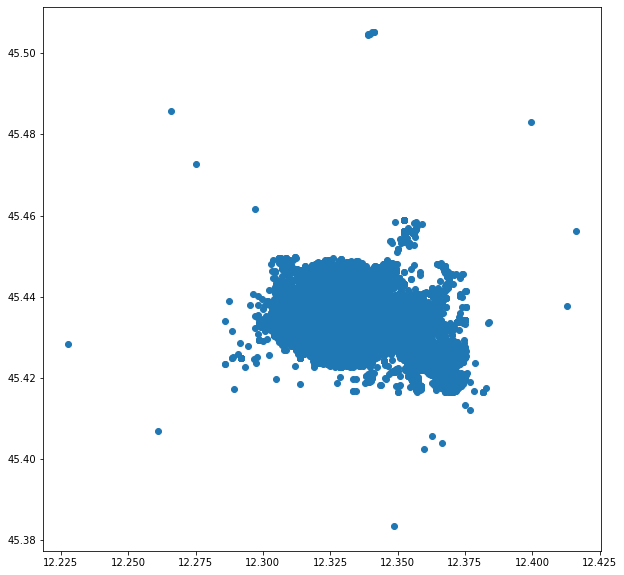

In [577]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df['lon'],df['lat'])

(array([1.0000e+00, 4.0000e+00, 1.3760e+03, 3.9981e+04, 7.6213e+04,
        5.0670e+03, 5.0000e+01, 1.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([45.383501 , 45.3956786, 45.4078562, 45.4200338, 45.4322114,
        45.444389 , 45.4565666, 45.4687442, 45.4809218, 45.4930994,
        45.505277 ]),
 <BarContainer object of 10 artists>)

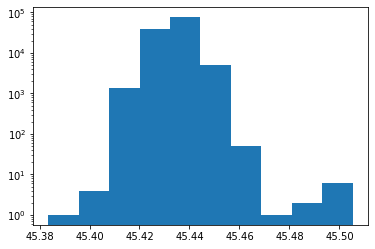

In [578]:
plt.hist(df['lat'],log=True)

(array([1.0000e+00, 1.0000e+00, 2.0000e+00, 1.6900e+02, 2.0363e+04,
        5.6701e+04, 4.0332e+04, 5.1210e+03, 8.0000e+00, 3.0000e+00]),
 array([12.227775 , 12.2466049, 12.2654348, 12.2842647, 12.3030946,
        12.3219245, 12.3407544, 12.3595843, 12.3784142, 12.3972441,
        12.416074 ]),
 <BarContainer object of 10 artists>)

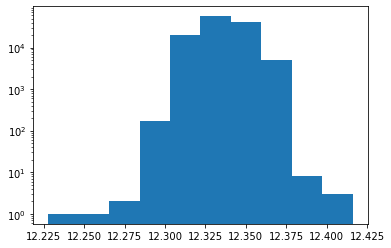

In [579]:
plt.hist(df['lon'],log=True)

(array([1.22699e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([      0. ,  117584.3,  235168.6,  352752.9,  470337.2,  587921.5,
         705505.8,  823090.1,  940674.4, 1058258.7, 1175843. ]),
 <BarContainer object of 10 artists>)

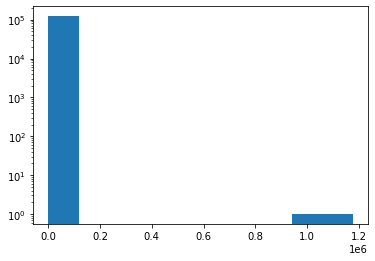

In [580]:
plt.hist(df['views'],log=True)

(array([ 6456.,  7338.,  7928.,  8933.,  8427., 10023., 15399., 14460.,
        19174.,  9712.]),
 array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020., 2021.]),
 <BarContainer object of 10 artists>)

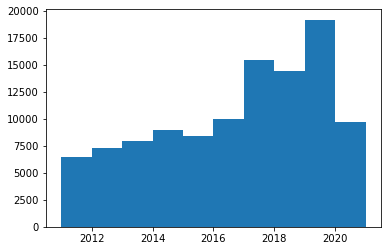

In [581]:
plt.hist(df[df.date>2010]['date'])

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.00000e+00, 3.00000e+01, 1.64000e+02, 1.77400e+03, 1.20723e+05]),
 array([1875. , 1889.6, 1904.2, 1918.8, 1933.4, 1948. , 1962.6, 1977.2,
        1991.8, 2006.4, 2021. ]),
 <BarContainer object of 10 artists>)

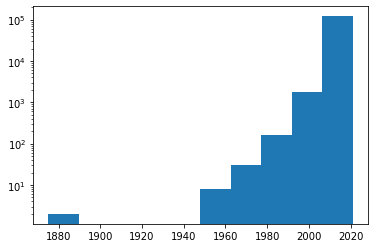

In [582]:
plt.hist(df['date'],log=True)

In [19]:
len(df_new['description'].unique())

820

In [205]:
candidates = df_new['description'].unique()

In [209]:
candidates = df_new['description'].drop_duplicates(keep='first')
len(candidates)

820

In [218]:
candidates.index

Int64Index([   0,    3,    6,    8,   10,   11,   14,   16,   18,   24,
            ...
            4178, 4179, 4180, 4181, 4182, 4183, 4186, 4189, 4191, 4192],
           dtype='int64', length=820)

In [21]:
from langdetect import detect

In [38]:
detect(candidates[85])

'en'

In [219]:
candi_dict = {}
origin = []
for i in candidates.index:
    for sent in candidates[i].split('. '):
        try:
            sent = re.sub(r'^https?:\/\/.*[\r\n]*', '', sent)
            sent = re.sub(r'\<.*\>', '', sent)
            sent = sent.replace('St.', 'St').replace('\n', ' ').replace('&quot', '').replace('&amp', '')
            for senty in sent.split('. '):
                if detect(senty)=='en' and senty.strip() not in candi_dict:
                    candi_dict[len(candi_dict)] = senty.strip()
                    origin.append(i)
        except:
            continue

In [220]:
len(candi_dict)

1425

In [221]:
len(origin)

1425

In [224]:
candi_df = pd.DataFrame.from_dict(candi_dict,orient='index',columns=['data'])
candi_df['origin'] = pd.Series(origin)

In [225]:
candi_df

,data,origin
0,Venice - January 2019,0
1,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3
2,The banks of the Grand Canal are lined with mo...,18
3,The noble Venetian families faced huge expense...,18
4,The churches along the canal include the basil...,18
...,...,...
1420,"The art installation called “Support,” was cre...",4191
1421,The human hands appear to support a historic h...,4191
1422,The sculptor intentionally based the shape of ...,4191
1423,Even though Support wasn’t officially part of ...,4191


In [149]:
# imports
import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
remove_accented_chars('Sómě Áccěntěd těxt. Some words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.')

'Some Accented text. Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.'

In [174]:
# Preprocess the reviews
def preprocess_text(text):
    if type(text) == float:
        print(text)
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = remove_accented_chars(text)
    text = re.sub(r"[^a-zA-Z0-9.,!?]+", r" ", text)
    text = text.strip()
    #text = re.sub(r"[0-9]+", r"<NUM> ", text)
    return text

In [226]:
candi_df['processed']=candi_df.data.apply(preprocess_text)

In [227]:
candi_df['len'] = candi_df.data.apply(lambda x: len(x.split()))

In [228]:
candi_df

,data,origin,processed,len
0,Venice - January 2019,0,venice january 2019,4
1,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,sony a7rii la ea3 sony af 70 400 f4 5 . 6 g ssm,11
2,The banks of the Grand Canal are lined with mo...,18,the banks of the grand canal are lined with mo...,36
3,The noble Venetian families faced huge expense...,18,the noble venetian families faced huge expense...,28
4,The churches along the canal include the basil...,18,the churches along the canal include the basil...,13
...,...,...,...,...
1420,"The art installation called “Support,” was cre...",4191,"the art installation called support , was crea...",11
1421,The human hands appear to support a historic h...,4191,the human hands appear to support a historic h...,34
1422,The sculptor intentionally based the shape of ...,4191,the sculptor intentionally based the shape of ...,22
1423,Even though Support wasn’t officially part of ...,4191,even though support wasnt officially part of t...,30


In [248]:
candi_df['camera'] = candi_df.processed.apply(lambda x: x.startswith('sony') or x.startswith('canon') or x.startswith('iphone') or x.startswith('dilution')
                                     or x.startswith('leica') or x.startswith('nikon') or x.startswith('fuji') or x.startswith('img') or x.startswith('buy')
                                              or x.startswith('rolleiflex') or x.startswith('ilford') or x.startswith('sigma') or x.startswith('e6') or x.startswith('click')
                                             or x.startswith('gear') or x.startswith('luminance') or x.startswith('fs') or x.startswith('mercedes')
                                              or x.startswith('actv') or x.startswith('atvo') or x.startswith('oebb'))

In [249]:
candi_df[candi_df.camera==True]

,data,origin,processed,len,camera
1,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,sony a7rii la ea3 sony af 70 400 f4 5 . 6 g ssm,11,True
14,Sony a7rII | Sigma MC-11 | Tamron 15-30mm f2.8...,53,sony a7rii sigma mc 11 tamron 15 30mm f2 . 8 v...,11,True
27,CANON EOS 6D Mark II con ob,59,canon eos 6d mark ii con ob,7,True
28,"CANON EF 70-300 f./4-5,6 IS USM",59,"canon ef 70 300 f . 4 5 , 6 is usm",6,True
29,Sony A7RMIII Zeiss Batis 1.8/85 Thanks for wat...,61,sony a7rmiii zeiss batis 1 . 8 85 thanks for w...,10,True
...,...,...,...,...,...
1329,Canon EOS R Canon 24-70mm f4 @ 35mm f11 13; IS...,3713,canon eos r canon 24 70mm f4 35mm f11 13 iso10...,51,True
1337,Canon EOS R Canon EF 16-35mm f4 @ 16mm f8 10; ...,3714,canon eos r canon ef 16 35mm f4 16mm f8 10 iso...,52,True
1342,CANON EOS 6D Mark II con ob,3765,canon eos 6d mark ii con ob,7,True
1343,"CANON 70-300 f./4-5,6 IS USM",3765,"canon 70 300 f . 4 5 , 6 is usm",5,True


In [250]:
len(candi_df[candi_df.camera==False]['processed'].unique())

1130

In [160]:
list(candi_df[candi_df.camera==False].data.unique())

['Venice - January 2019',
 'The banks of the Grand Canal are lined with more than 170 buildings, most of which date from the 13th to the 18th century, and demonstrate the welfare and art created by the Republic of Venice',
 'The noble Venetian families faced huge expenses to show off their richness in suitable palazzos; this contest reveals the citizens’ pride and the deep bond with the lagoon',
 'The churches along the canal include the basilica of Santa Maria della Salute',
 'Centuries-old traditions, such as the Historical Regatta [it], are perpetuated every year along the Canal',
 "Because most of the city's traffic goes along the Canal rather than across it, only one bridge crossed the canal until the 19th century, the Rialto Bridge",
 "There are currently three more bridges, the Ponte degli Scalzi, the Ponte dell'Accademia, and the controversial Ponte della Costituzione from 2008, designed by Santiago Calatrava, connecting the train station to Piazzale Roma, one of the few places

In [119]:
candi_df.iloc[237]

data         OeBB 2nd Class Couchette Car. 7381 5991 108-5 ...
processed    oebb 2nd class couchette car . 7381 5991 108 5...
len                                                         19
camera                                                   False
Name: 237, dtype: object

<AxesSubplot:>

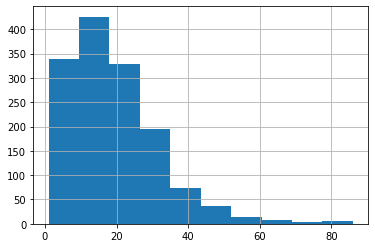

In [165]:
candi_df['len'].hist()

In [190]:
list(candi_df[candi_df.len==5]['processed'])

['canon ef 24 85 f . 3 , 5 4 , 5 usm',
 'photo posted with hidden watermark',
 'in explore 25 nov 2020',
 'double click to see more details .',
 'from rialto bridge , venice , italy',
 'actv no35 iveco cityclass gnc',
 'actv no44 iveco urbanway gnc',
 'actv no28 iveco cityclass gnc',
 'actv no32 iveco cityclass gnc',
 'rialto fish market venice',
 'canon ef 24 85 f . 3 , 5 4 , 5 usm',
 'palazzo gradenigo on the right',
 'john the baptist and st',
 'canal grande from rialto bridge',
 'oebb 2nd class couchette car',
 'where they build gondolas !',
 'shot on ilford fp4 plus',
 '2014 experimenting with rain textures .',
 'the piazza is not rectangular',
 'st mark s clocktower venice , italy',
 'christian denomination roman catholic church',
 'edited with snapseed and icolorama .',
 'forse una schiarita sul canal',
 'accomodations venice , italy 2009',
 'thinking back to wonderful venice',
 'death in venice today abandoned .',
 'mark s campanile venice veneto italy',
 'the water of the city

In [251]:
candi_new = candi_df[(candi_df.camera==False) & (candi_df.len>7)].drop_duplicates(keep='first')

In [252]:
candi_new

,data,origin,processed,len,camera
2,The banks of the Grand Canal are lined with mo...,18,the banks of the grand canal are lined with mo...,36,False
3,The noble Venetian families faced huge expense...,18,the noble venetian families faced huge expense...,28,False
4,The churches along the canal include the basil...,18,the churches along the canal include the basil...,13,False
5,"Centuries-old traditions, such as the Historic...",18,"centuries old traditions , such as the histori...",15,False
6,Because most of the city's traffic goes along ...,18,because most of the city s traffic goes along ...,27,False
...,...,...,...,...,...
1418,Although the district includes Saint Mark's Sq...,4189,although the district includes saint mark s sq...,16,False
1420,"The art installation called “Support,” was cre...",4191,"the art installation called support , was crea...",11,False
1421,The human hands appear to support a historic h...,4191,the human hands appear to support a historic h...,34,False
1422,The sculptor intentionally based the shape of ...,4191,the sculptor intentionally based the shape of ...,22,False


In [253]:
len(candi_new['origin'].unique())

331

In [254]:
data_new = candi_new.merge(df_new, how = 'left', left_on = 'origin', right_index = True)

In [255]:
data_new

,data,origin,processed,len,camera,ids,owner,owner_loc,title,description,...,views,people,tags,lat,lon,neighbourhood,url,local,tag_list,tag_len
2,The banks of the Grand Canal are lined with mo...,18,the banks of the grand canal are lined with mo...,36,False,50765664756,63848257@N06,"Devon, UK","The Grand Canal at sunset - Venice, Italy",The banks of the Grand Canal are lined with mo...,...,1423,0,"[{'id': '63802935-50765664756-8649', 'author':...",45.441163,12.333376,NaN,https://www.flickr.com/photos/hickatee/5076566...,False,"[grand, canal, venice, ipm, sunset, italy]",6
3,The noble Venetian families faced huge expense...,18,the noble venetian families faced huge expense...,28,False,50765664756,63848257@N06,"Devon, UK","The Grand Canal at sunset - Venice, Italy",The banks of the Grand Canal are lined with mo...,...,1423,0,"[{'id': '63802935-50765664756-8649', 'author':...",45.441163,12.333376,NaN,https://www.flickr.com/photos/hickatee/5076566...,False,"[grand, canal, venice, ipm, sunset, italy]",6
4,The churches along the canal include the basil...,18,the churches along the canal include the basil...,13,False,50765664756,63848257@N06,"Devon, UK","The Grand Canal at sunset - Venice, Italy",The banks of the Grand Canal are lined with mo...,...,1423,0,"[{'id': '63802935-50765664756-8649', 'author':...",45.441163,12.333376,NaN,https://www.flickr.com/photos/hickatee/5076566...,False,"[grand, canal, venice, ipm, sunset, italy]",6
5,"Centuries-old traditions, such as the Historic...",18,"centuries old traditions , such as the histori...",15,False,50765664756,63848257@N06,"Devon, UK","The Grand Canal at sunset - Venice, Italy",The banks of the Grand Canal are lined with mo...,...,1423,0,"[{'id': '63802935-50765664756-8649', 'author':...",45.441163,12.333376,NaN,https://www.flickr.com/photos/hickatee/5076566...,False,"[grand, canal, venice, ipm, sunset, italy]",6
6,Because most of the city's traffic goes along ...,18,because most of the city s traffic goes along ...,27,False,50765664756,63848257@N06,"Devon, UK","The Grand Canal at sunset - Venice, Italy",The banks of the Grand Canal are lined with mo...,...,1423,0,"[{'id': '63802935-50765664756-8649', 'author':...",45.441163,12.333376,NaN,https://www.flickr.com/photos/hickatee/5076566...,False,"[grand, canal, venice, ipm, sunset, italy]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Although the district includes Saint Mark's Sq...,4189,although the district includes saint mark s sq...,16,False,50758454032,52559257@N02,NaN,38060,The Piazza San Marco (St Mark's Square) in the...,...,286,0,"[{'id': '52538909-50758454032-297', 'author': ...",45.434166,12.338719,San Marco,https://www.flickr.com/photos/benbobjr/5075845...,False,"[italy, italianrepublic, repubblicaitaliana, e...",16
1420,"The art installation called “Support,” was cre...",4191,"the art installation called support , was crea...",11,False,50754161007,26849514@N06,Netherlands,"Support - Save Venice from drowning, Venice, I...","The art installation called “Support,” was cre...",...,971,0,"[{'id': '26804192-50754161007-10454787', 'auth...",45.440463,12.334256,NaN,https://www.flickr.com/photos/26849514@N06/507...,False,"[img, venice, venedig, venezia, fsp]",5
1421,The human hands appear to support a historic h...,4191,the human hands appear to support a historic h...,34,False,50754161007,26849514@N06,Netherlands,"Support - Save Venice from drowning, Venice, I...","The art installation called “Support,” was cre...",...,971,0,"[{'id': '26804192-50754161007-10454787', 'auth...",45.440463,12.334256,NaN,https://www.flickr.com/photos/26849514@N06/507...,False,"[img, venice, venedig, venezia, fsp]",5
1422,The sculptor intentionally based the shape of ...,4191,the sculptor intentionally based the shape of ...,22,False,50754161007,26849514@N06,Netherlands,"Support - Save Venice from drowning, Venice, I...","The art installation called “Support,” was cre...",...,971,0,"[{'id': '26804192-5075

In [256]:
len(data_new['owner_loc'].unique())

54

In [257]:
data_new.to_csv('description_5km.csv', encoding='utf-8-sig')